In [61]:
from data_loader.datautils import *
%pylab
%matplotlib inline
matplotlib.rc('font', size=30)

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [65]:
# save_vocab("data/", "data/bachpianovocab.pkl", prefix="bach")

In [64]:
# save_vocab("data/", "data/lizpianovocab.pkl", prefix="liz")

In [106]:
# save_vocab("data/", "data/mendelpianovocab.pkl", prefix="mendel")

Adding notes from data/Piano-midi.de/test/mendel_op62_5.mid
Adding notes from data/Piano-midi.de/train/mendel_op62_4.mid
Adding notes from data/Piano-midi.de/train/mendel_op62_3.mid
Adding notes from data/Piano-midi.de/train/mendel_op53_5.mid
Adding notes from data/Piano-midi.de/train/mendel_op30_1.mid
3850 notes and chords found in total.
167 unique notes and chords found.
Vocab saved to data/mendelpianovocab.pkl


In [110]:
# save_vocab("data/", "data/musspianovocab.pkl", prefix="muss")

In [114]:
# save_vocab("data/", "data/mzpianovocab.pkl", prefix="mz")

In [115]:
# save_vocab("data/", "data/griegpianovocab.pkl", prefix="grieg")

In [117]:
save_vocab("data/", "data/scnpianovocab.pkl", prefix="scn")

Adding notes from data/Piano-midi.de/test/scn15_4.mid
Adding notes from data/Piano-midi.de/train/scn15_6.mid
Adding notes from data/Piano-midi.de/train/scn15_5.mid
Adding notes from data/Piano-midi.de/train/scn15_3.mid
Adding notes from data/Piano-midi.de/train/scn15_1.mid
Adding notes from data/Piano-midi.de/train/scn15_2.mid
2236 notes and chords found in total.
103 unique notes and chords found.
Vocab saved to data/scnpianovocab.pkl


In [122]:
def vizualize(filename):
    # Load pickle
    with open(filename, 'rb') as fi:
        data = pkl.load(fi)
    
    data = list(data.items())
    occ = [(x[0], x[1][0]) for x in data]
    occ = list(sorted(occ, key=lambda x: -x[1]))
    # Get zipf's law
    zipf = np.arange(len(occ))
    k, a = find_best_power([x[1] for x in occ])
    zipf = a/(1 + zipf)**k
    
    plt.figure(figsize=(12, 12))
    plt.plot(np.arange(len(occ)), [x[1] for x in occ], color='blue')
    plt.plot(zipf, color='green')
    plt.legend(['Notes', 'Power law at k = {}'.format(np.around(k, 2))])
    plt.title(filename.split('/')[-1].split('.')[0].replace('pianovocab', '').capitalize())
    plt.ylim(0, occ[0][1] + 10)
    plt.ylabel('# occurances')
    plt.xlabel('Rank of note/chord')
    plt.show()

In [123]:
def find_best_power(Freq):
    freq = np.array(Freq)
    N = len(freq)
    # Now fit power law (log(y) - A + klog(x))**2
    logy = np.log(freq)
    logx = np.log(1 + np.arange(N))
    # Solve for k and A
    sumx = logx.sum()
    sumxsr = (logx**2).sum()
    sumy = (logy).sum()
    sumyx = (logy*logx).sum()
    A = np.array([[sumxsr, -sumx], [sumx, -N]])
    b = np.array([-sumyx, -sumy])
    k, a = np.linalg.inv(A) @ b
    return k, np.exp(a)

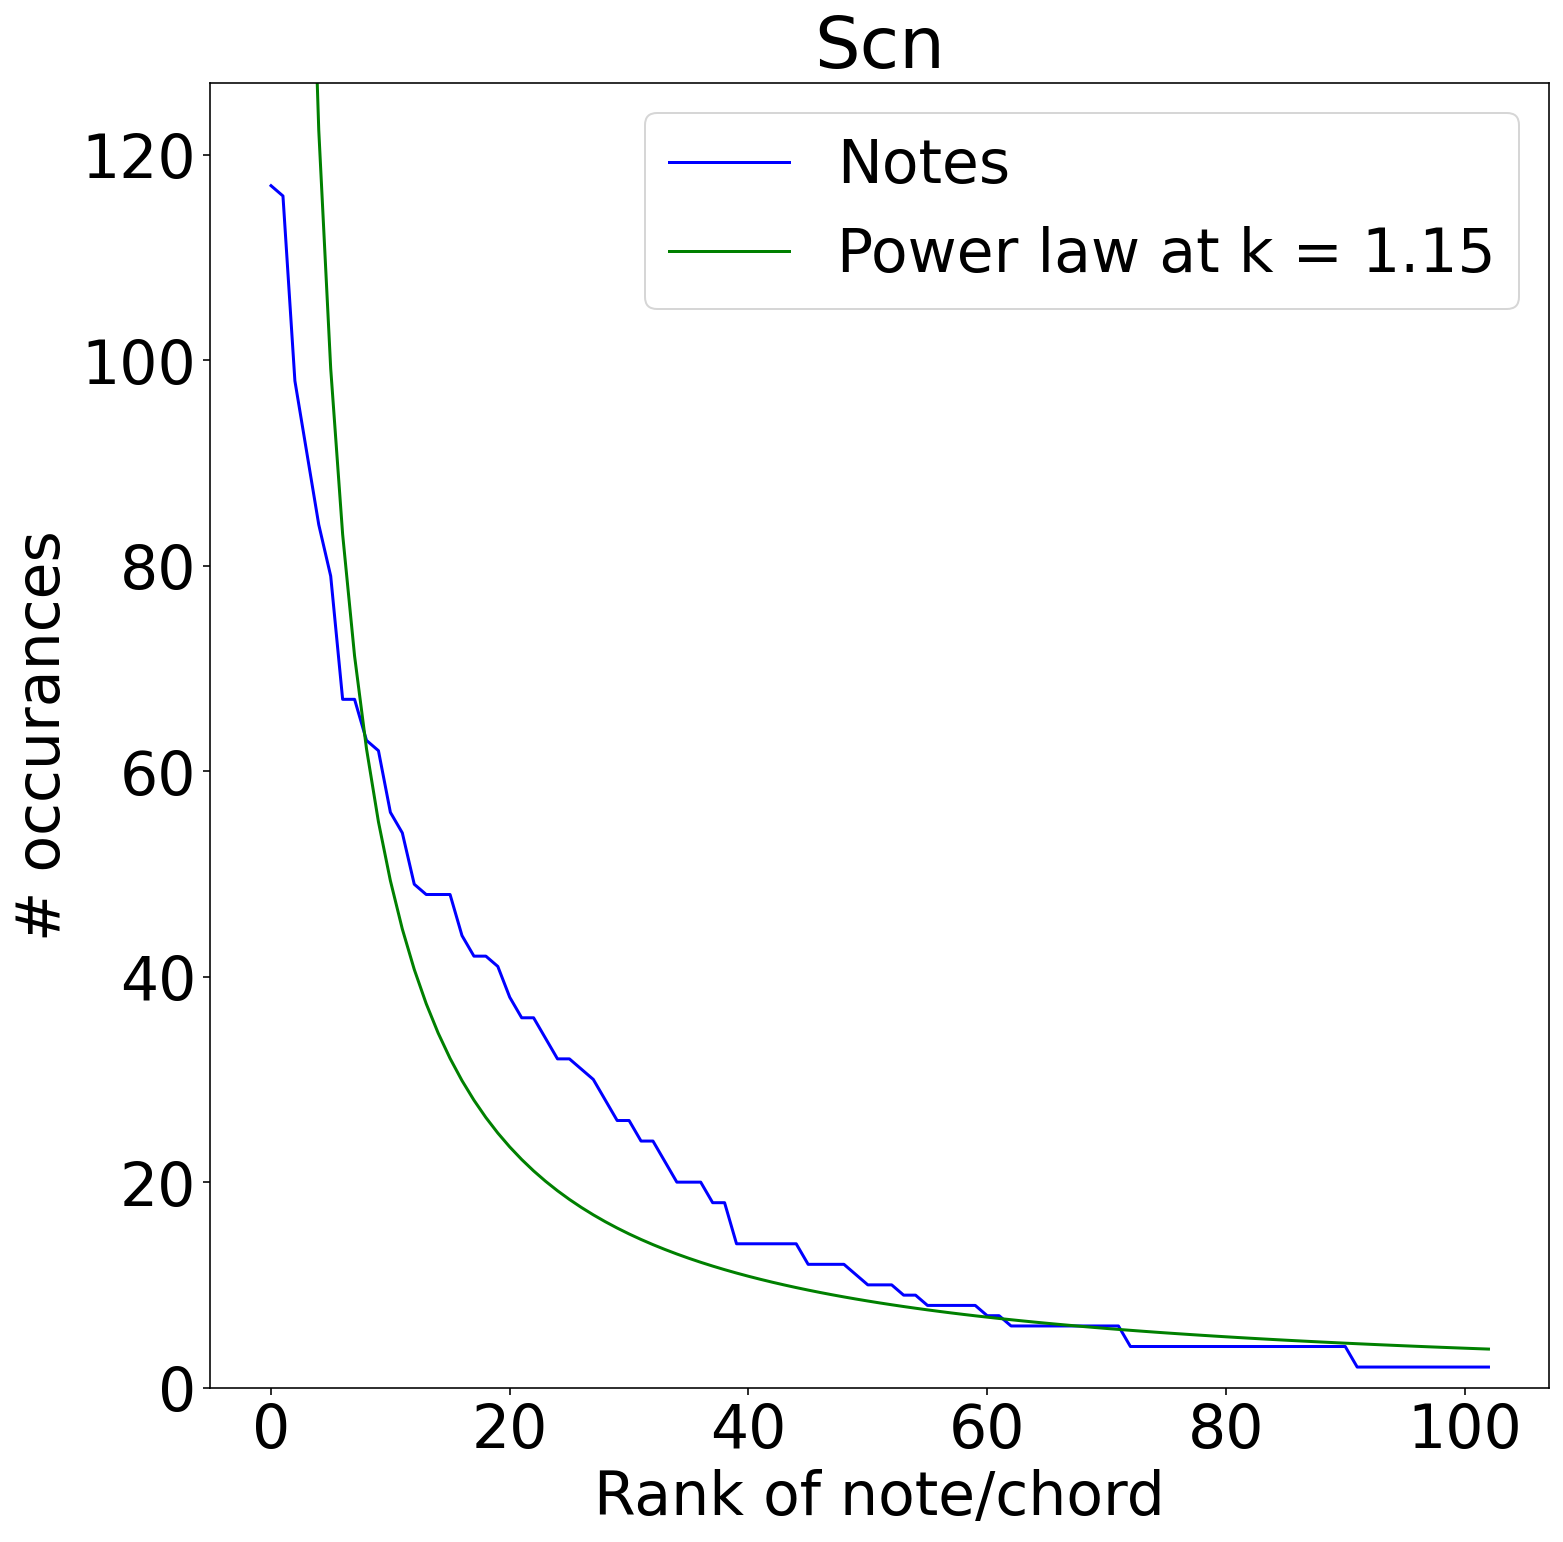

In [124]:
vizualize("data/scnpianovocab.pkl")

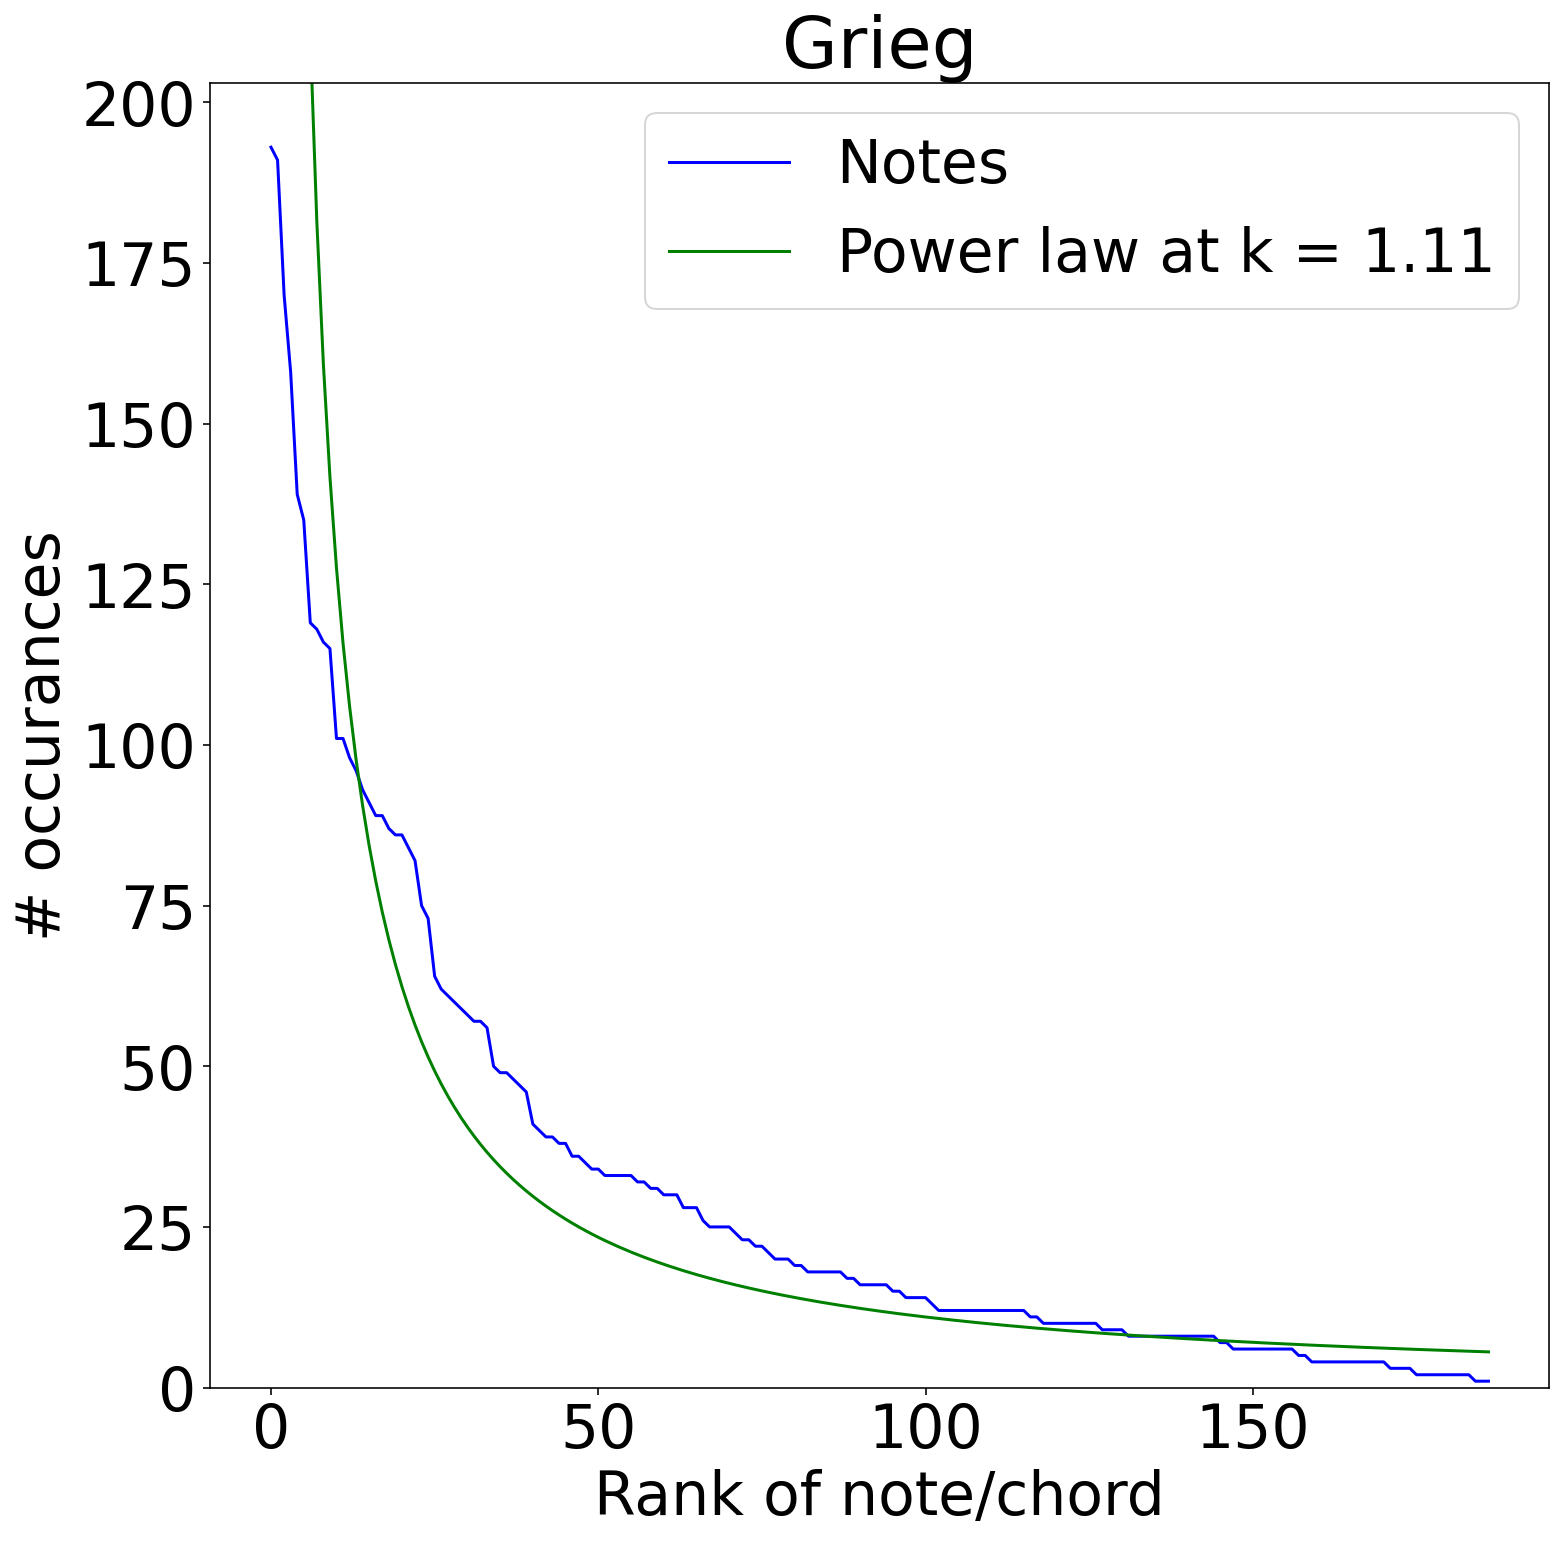

In [125]:
vizualize("data/griegpianovocab.pkl")

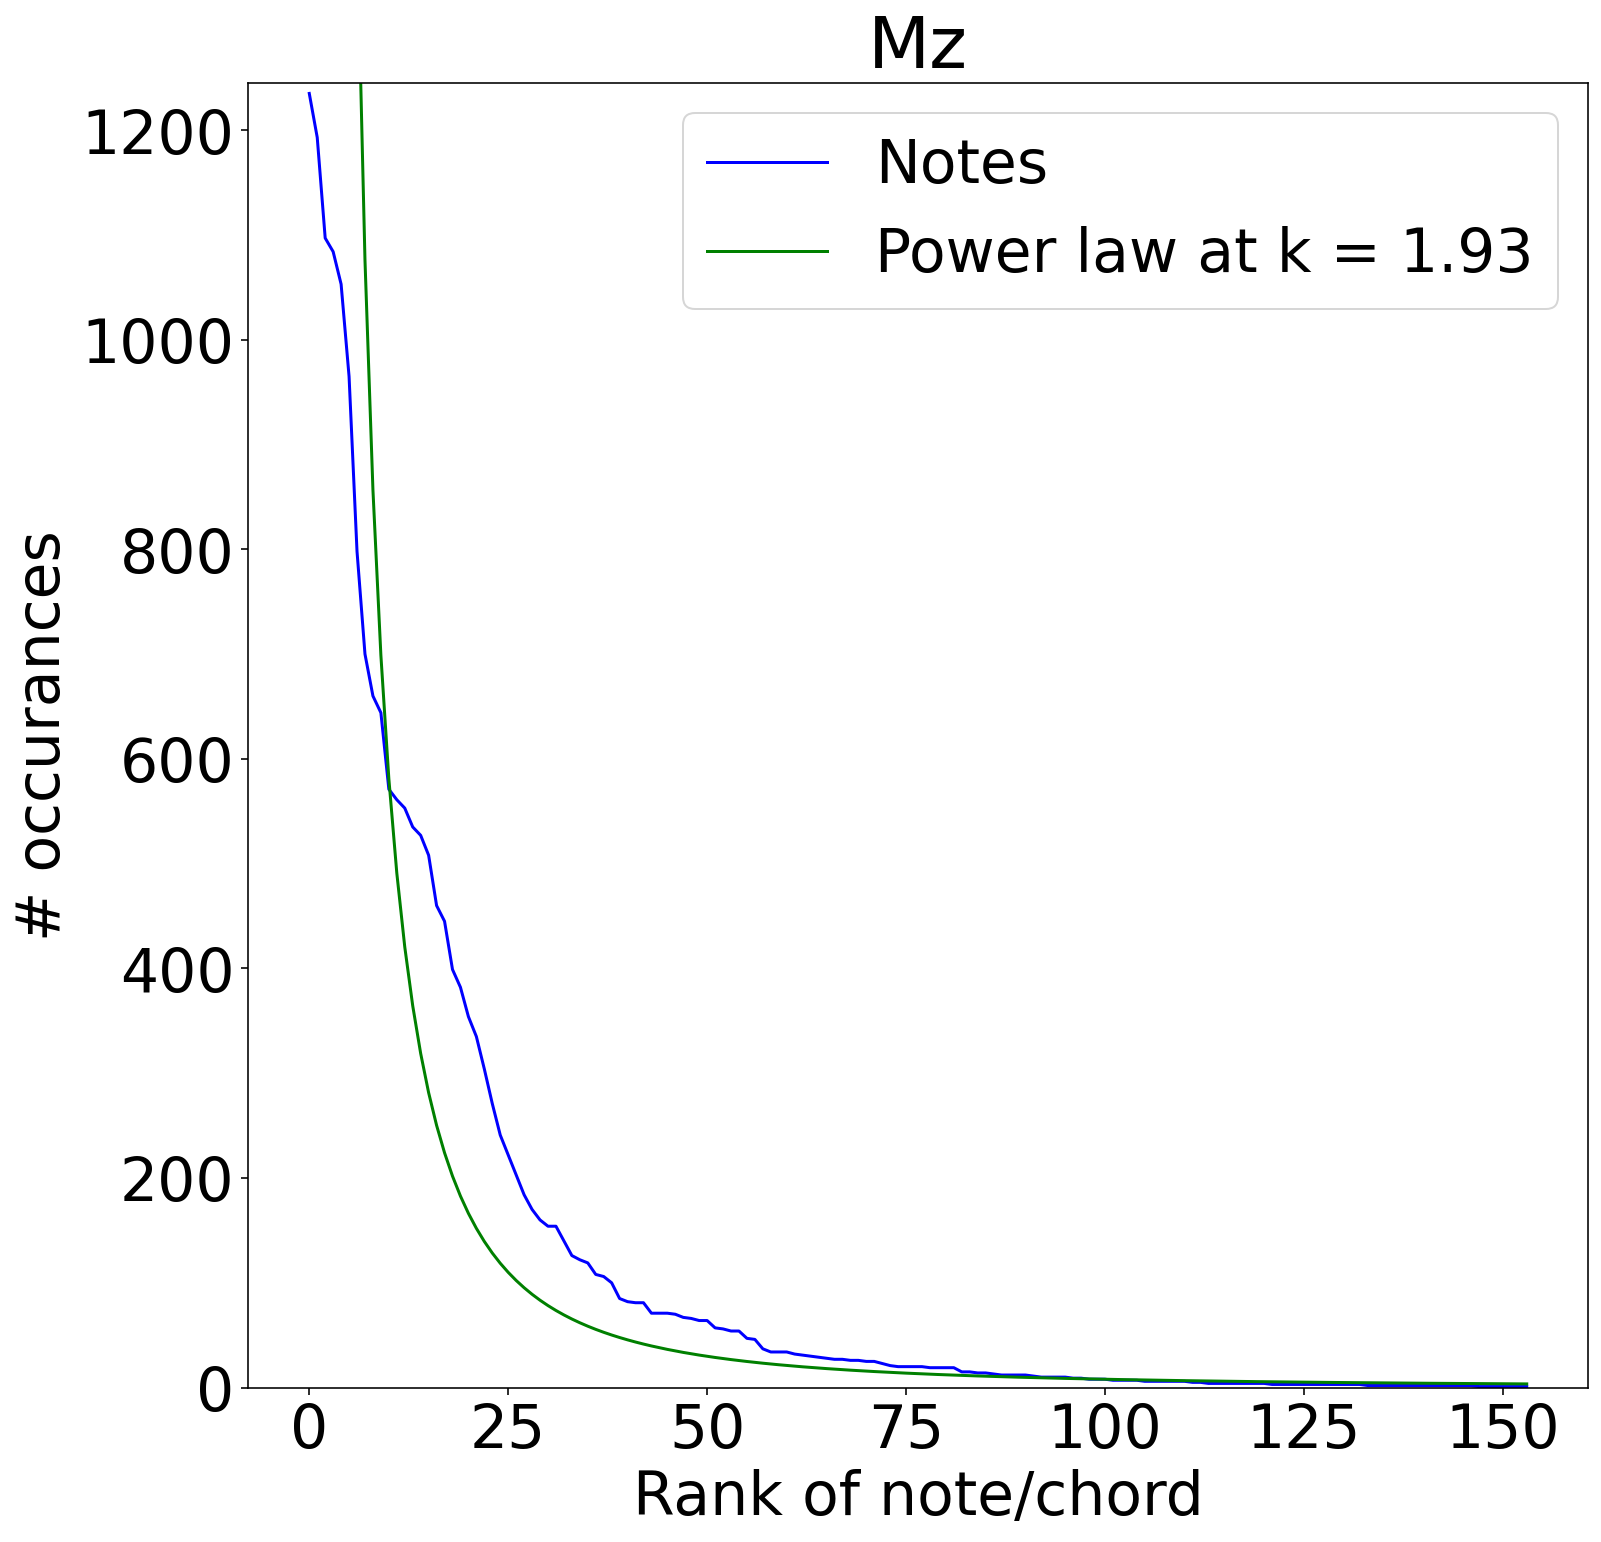

In [126]:
vizualize("data/mzpianovocab.pkl")

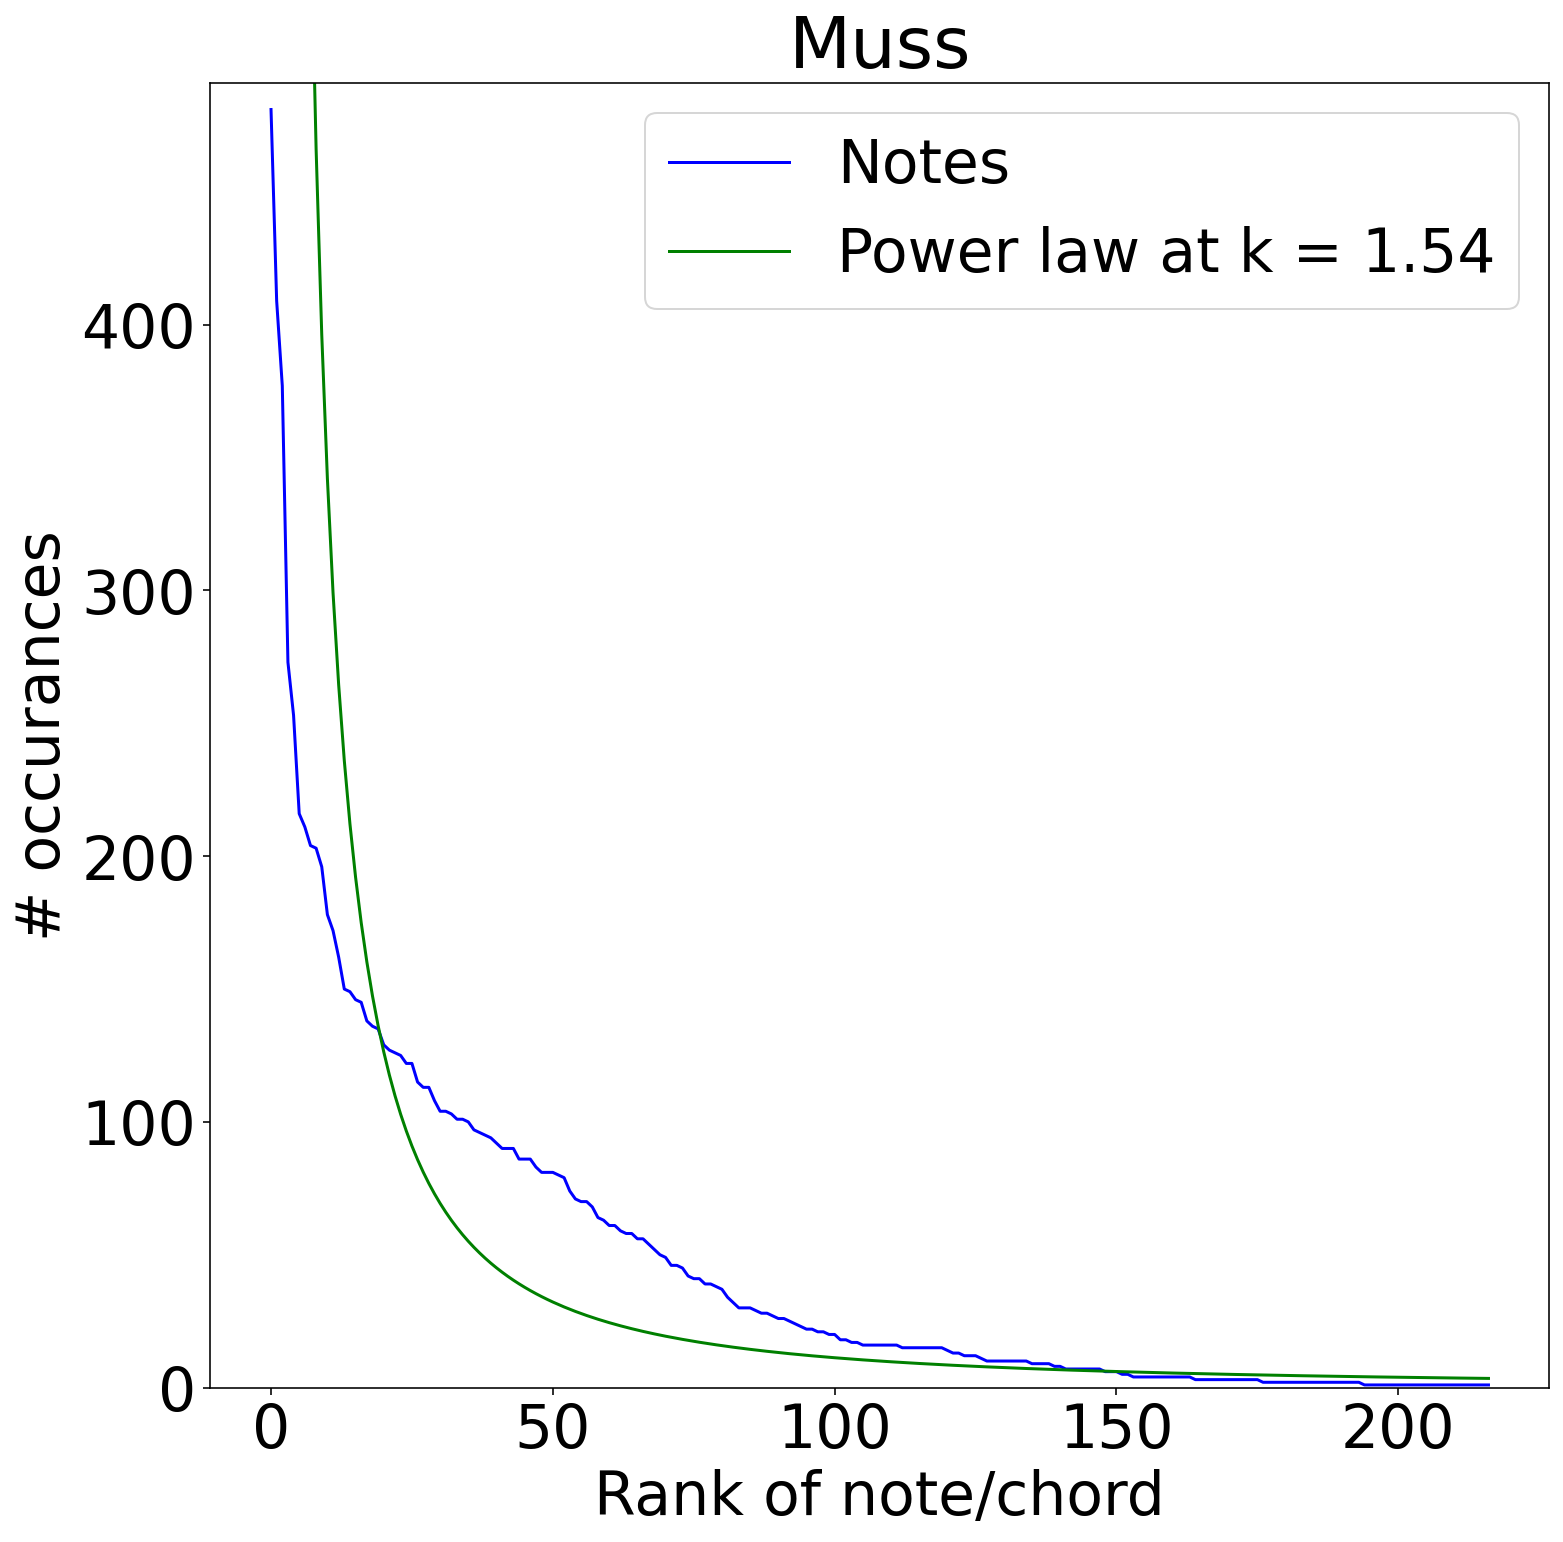

In [127]:
vizualize("data/musspianovocab.pkl")

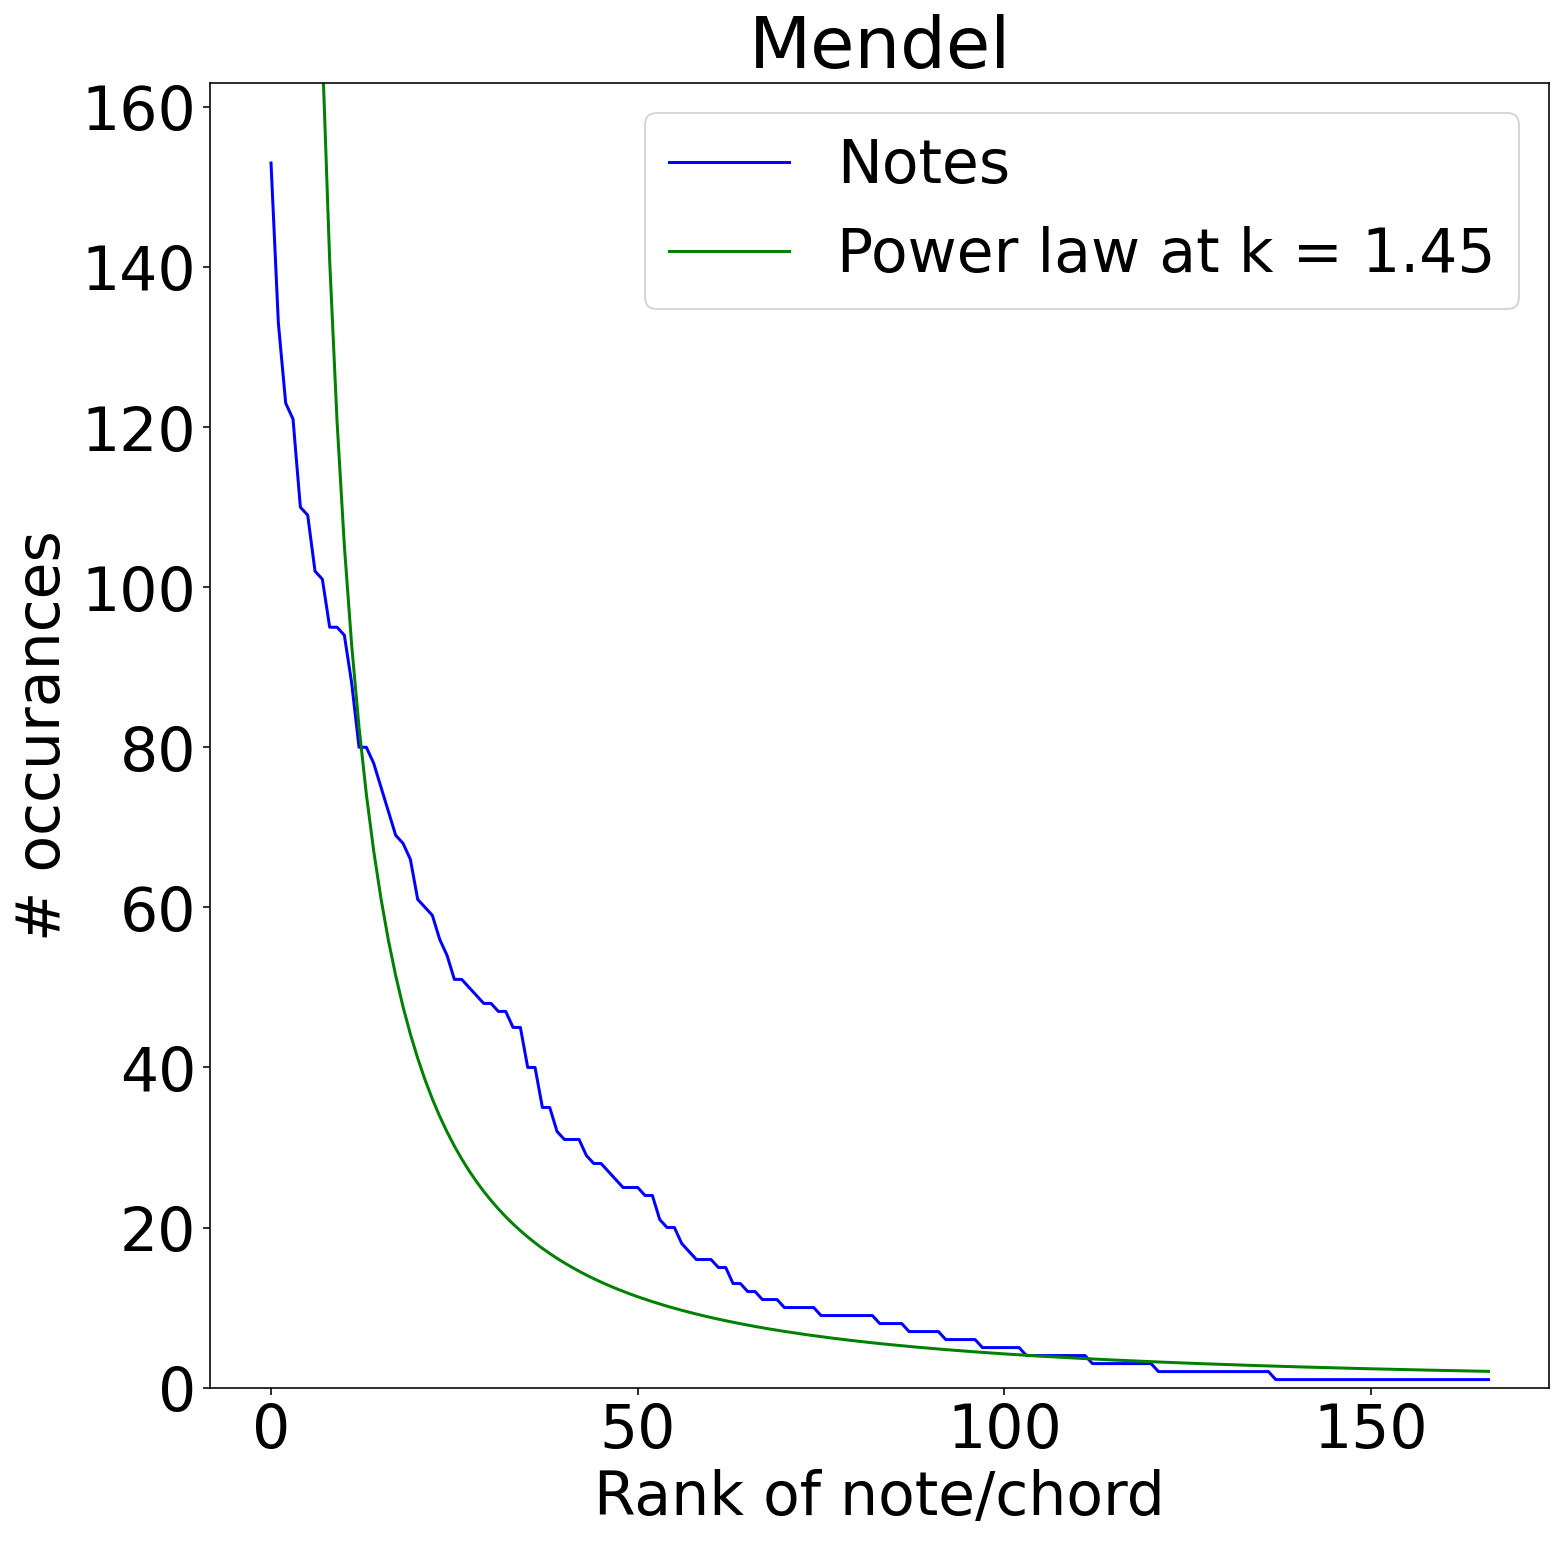

In [128]:
vizualize("data/mendelpianovocab.pkl")

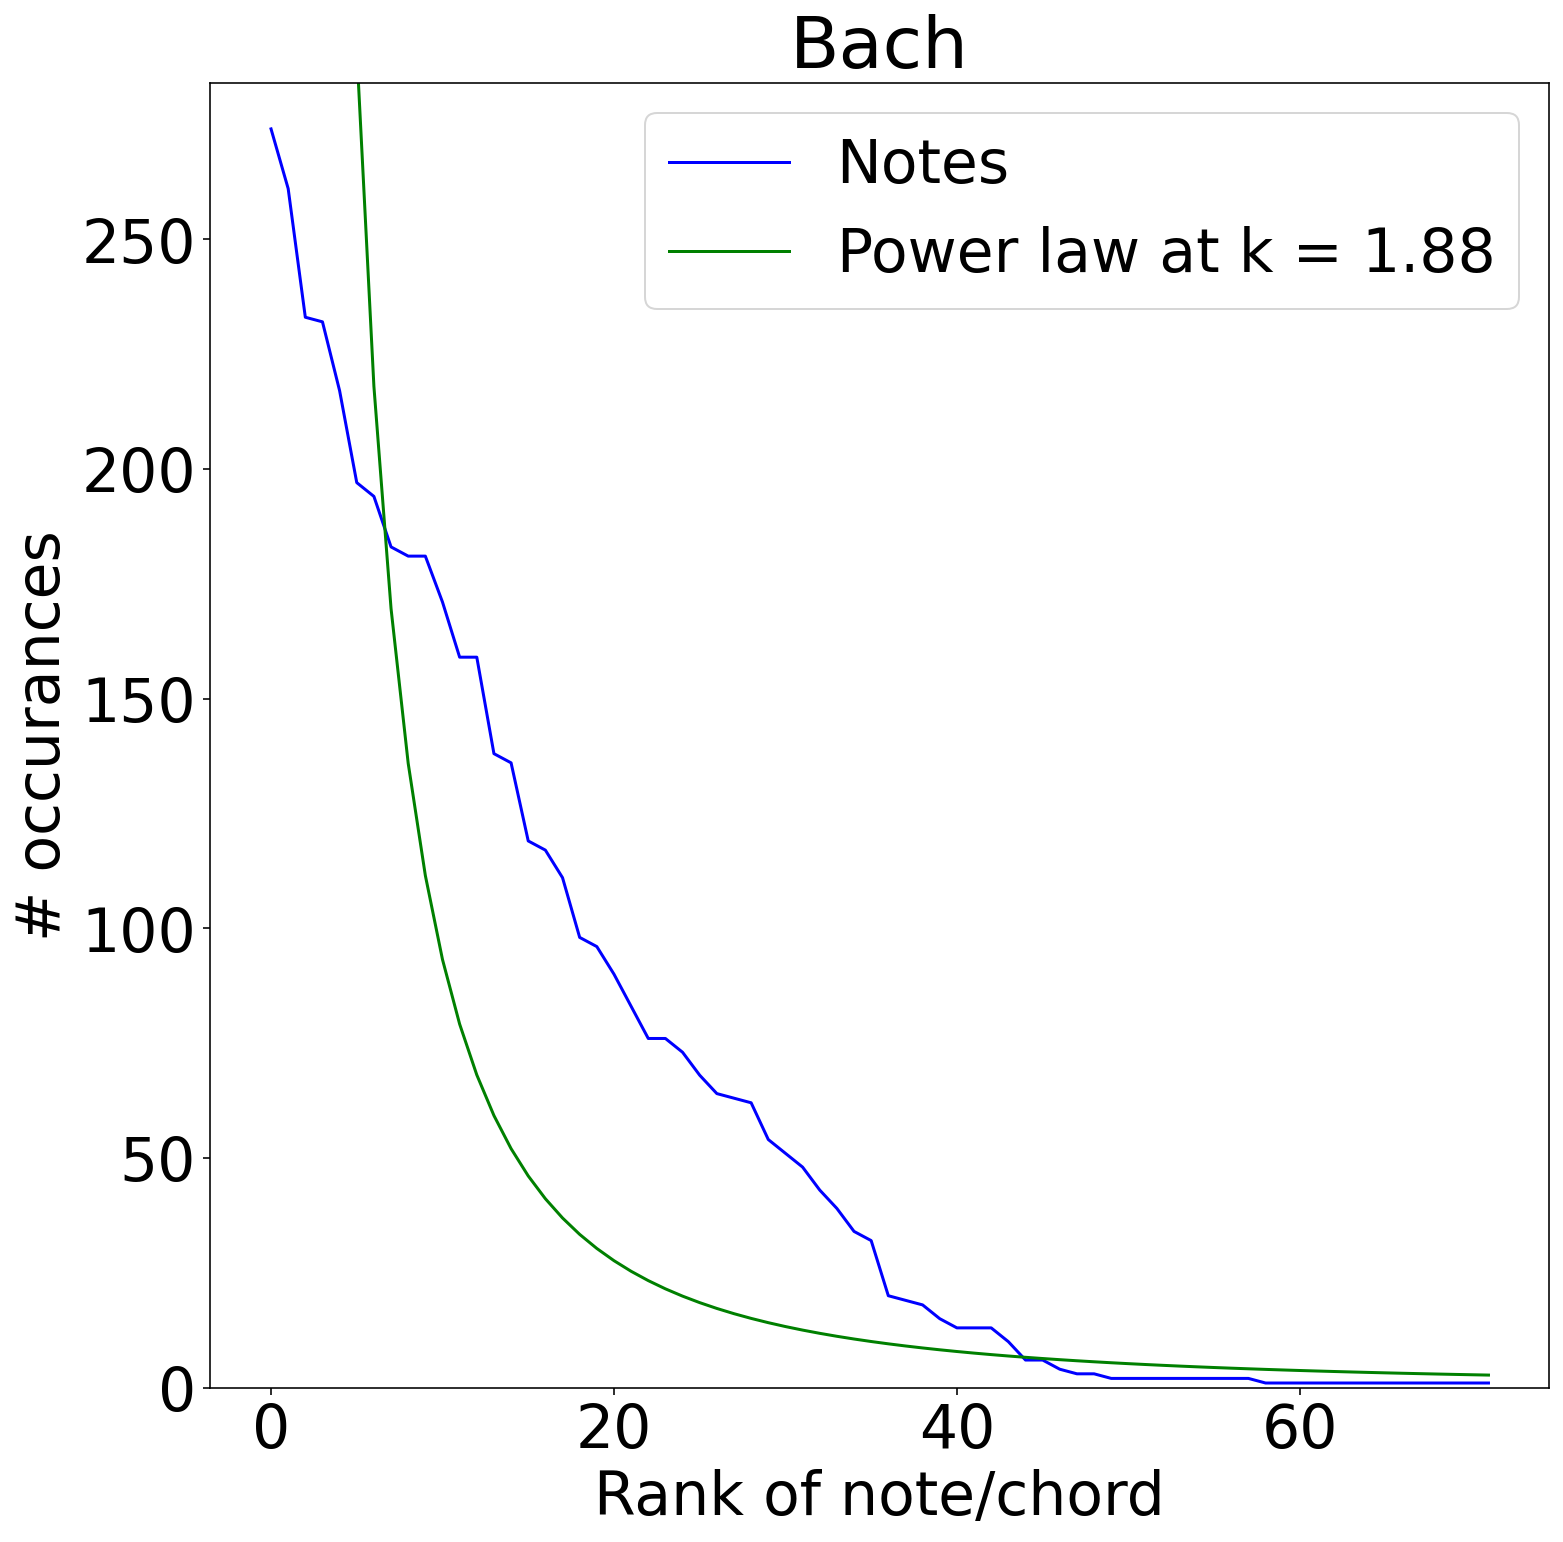

In [129]:
vizualize("data/bachpianovocab.pkl")

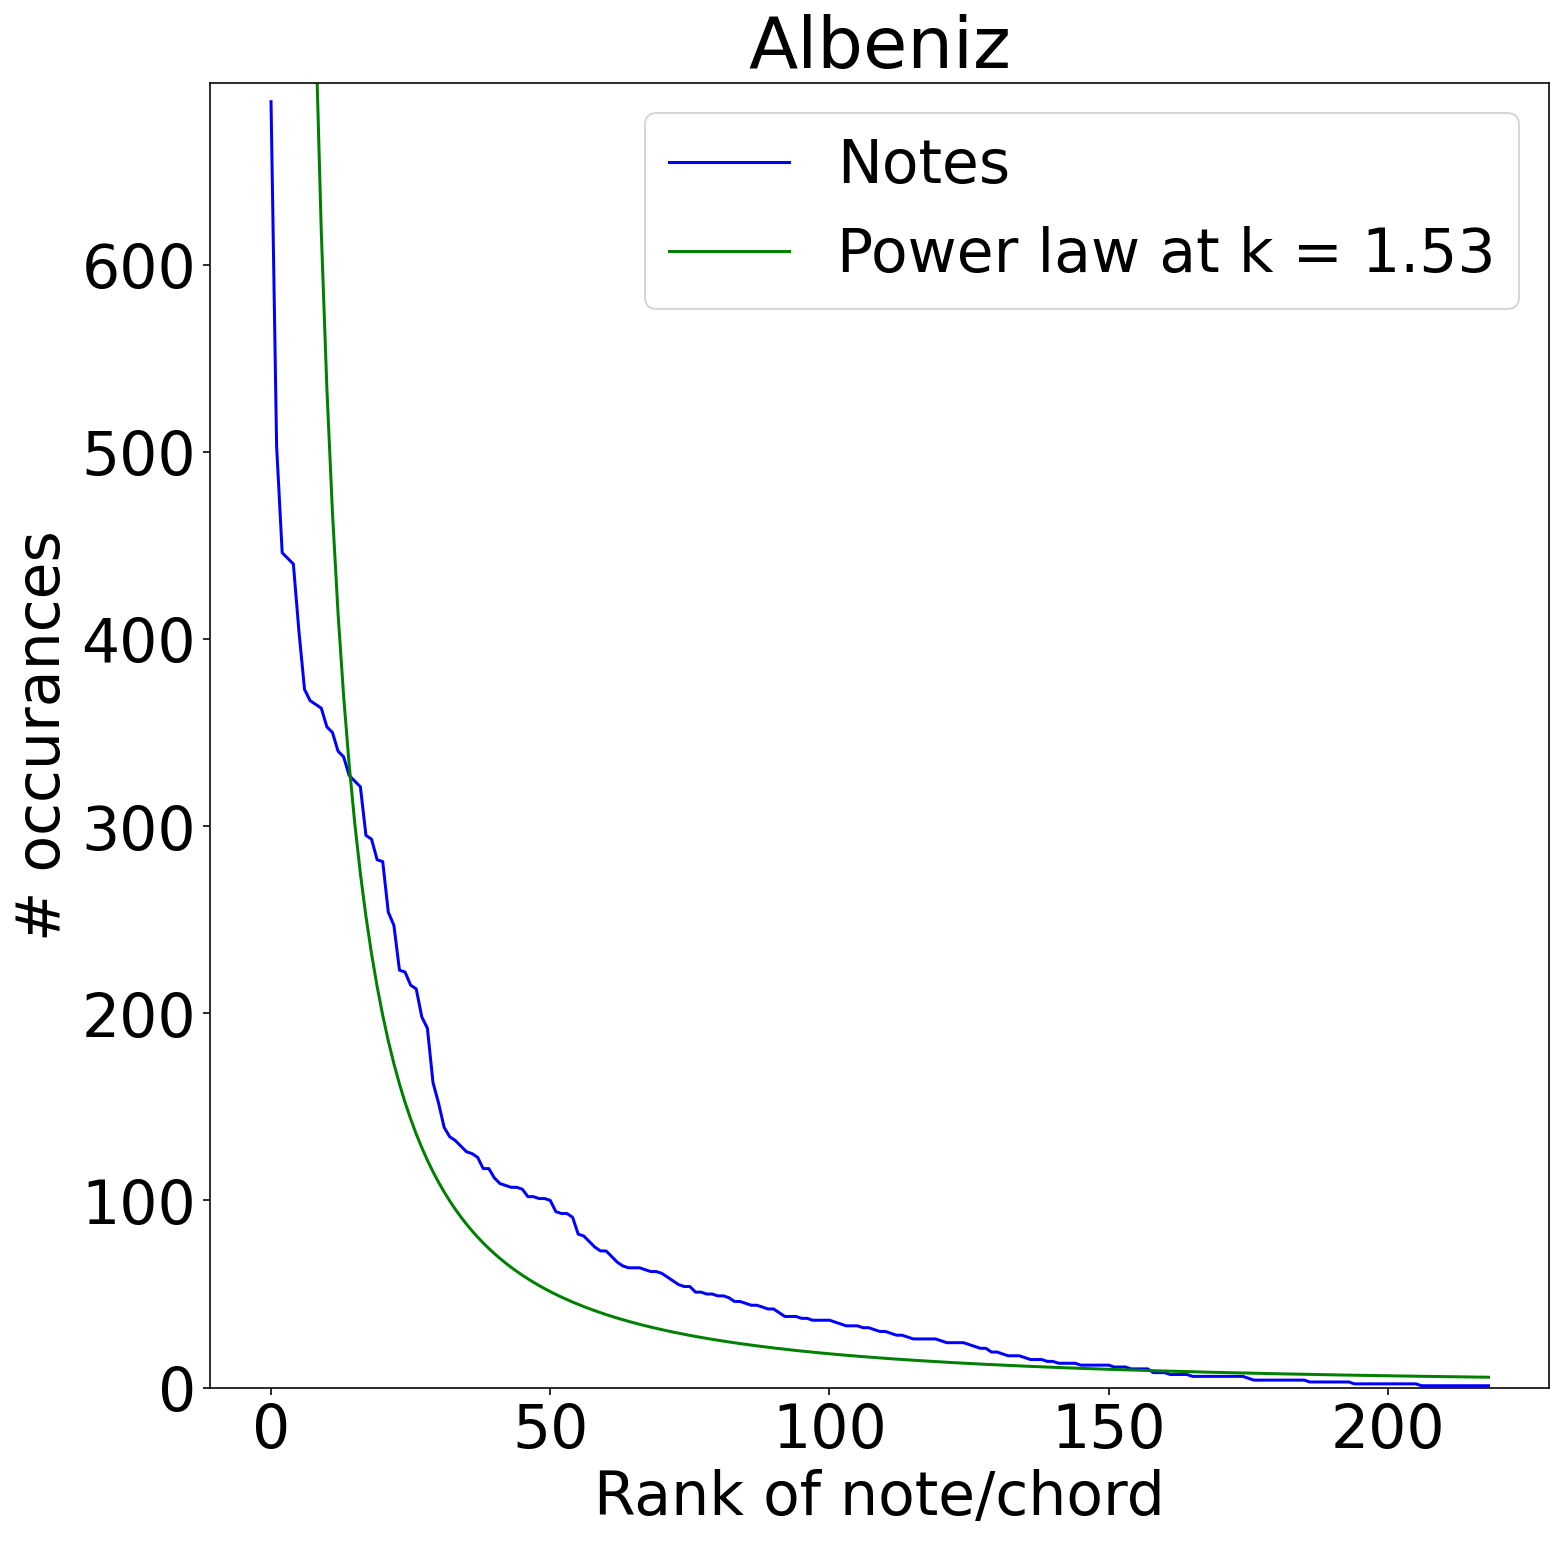

In [130]:
vizualize("data/albenizpianovocab.pkl")

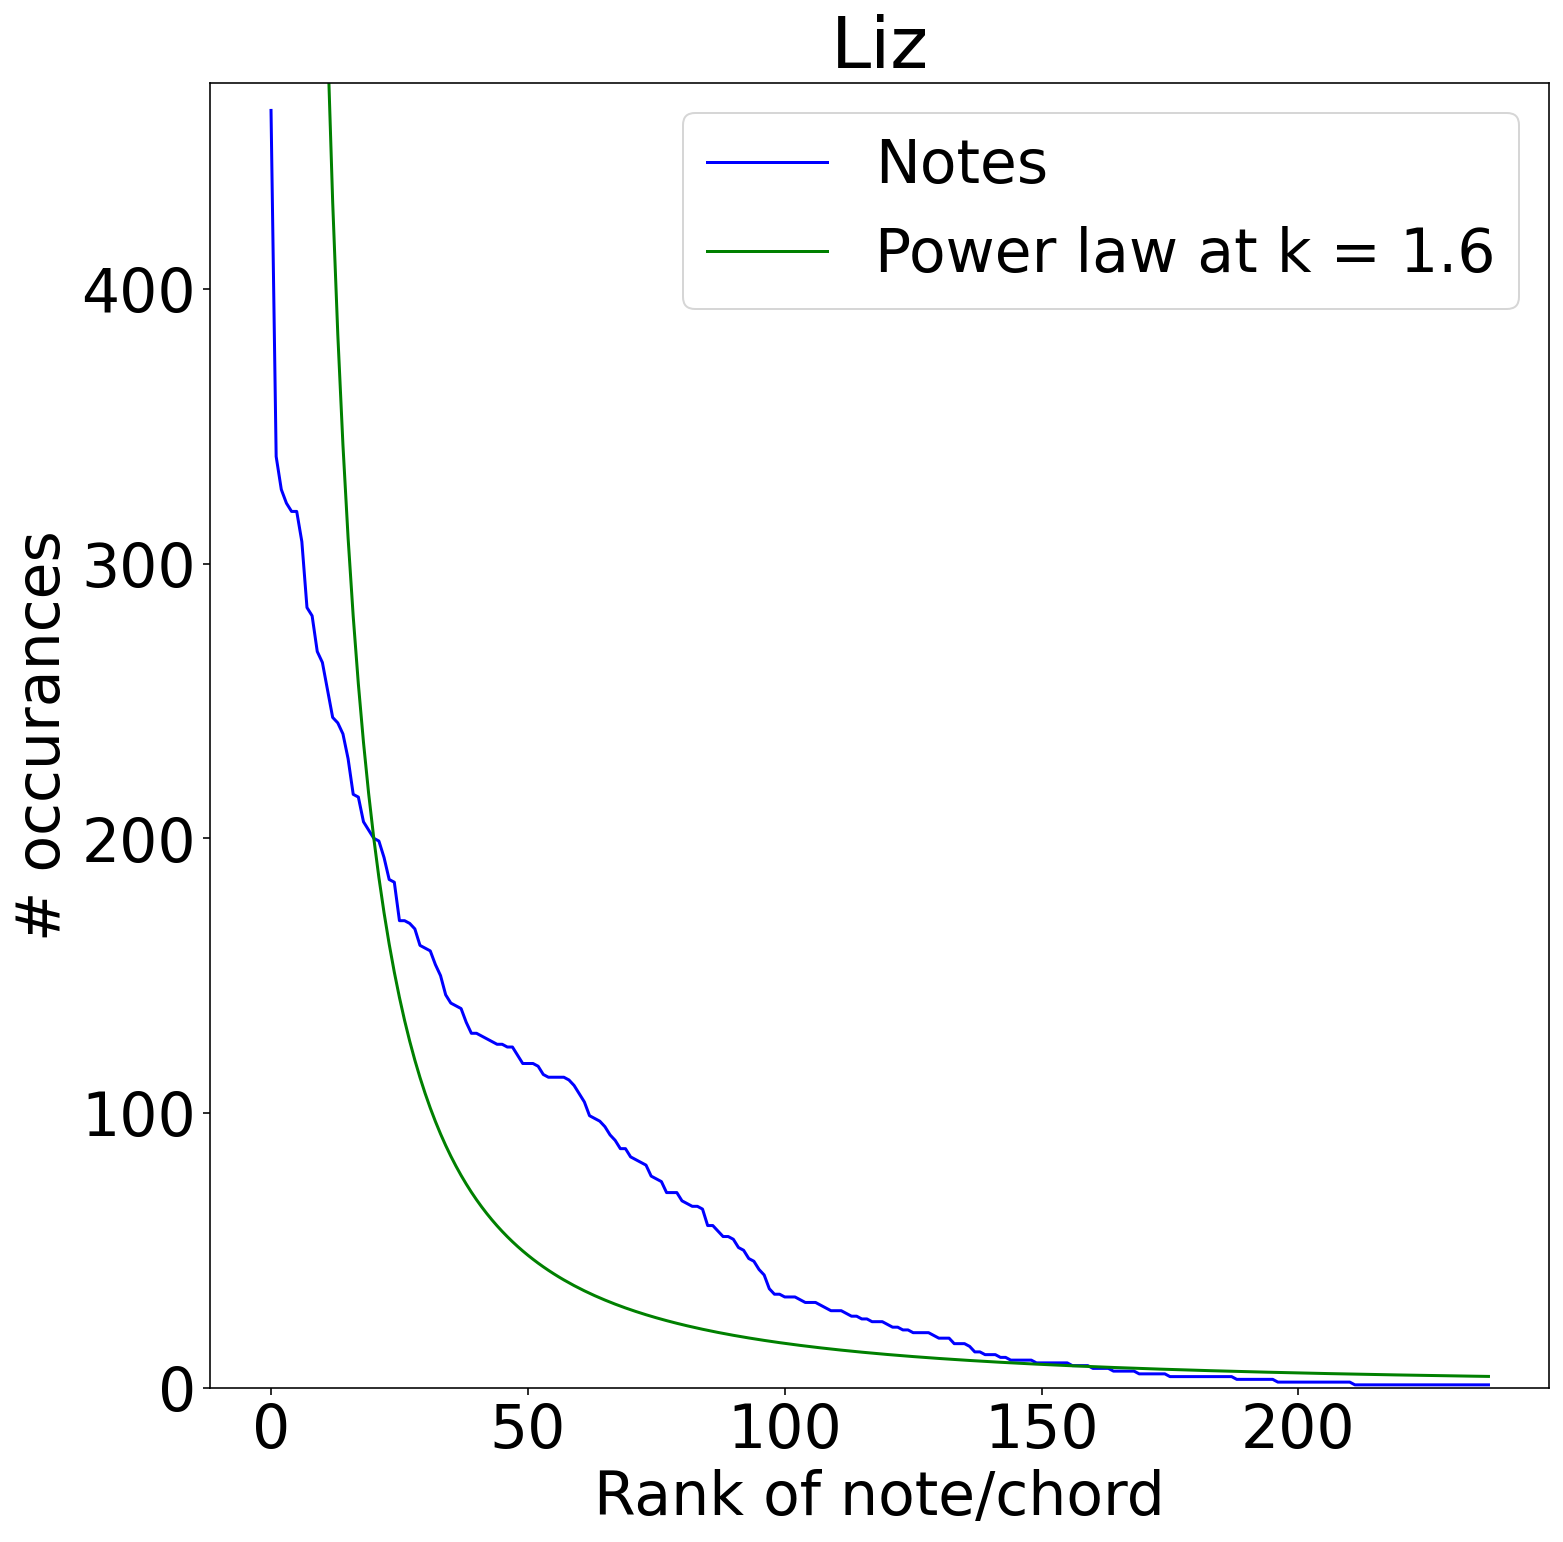

In [131]:
vizualize("data/lizpianovocab.pkl")

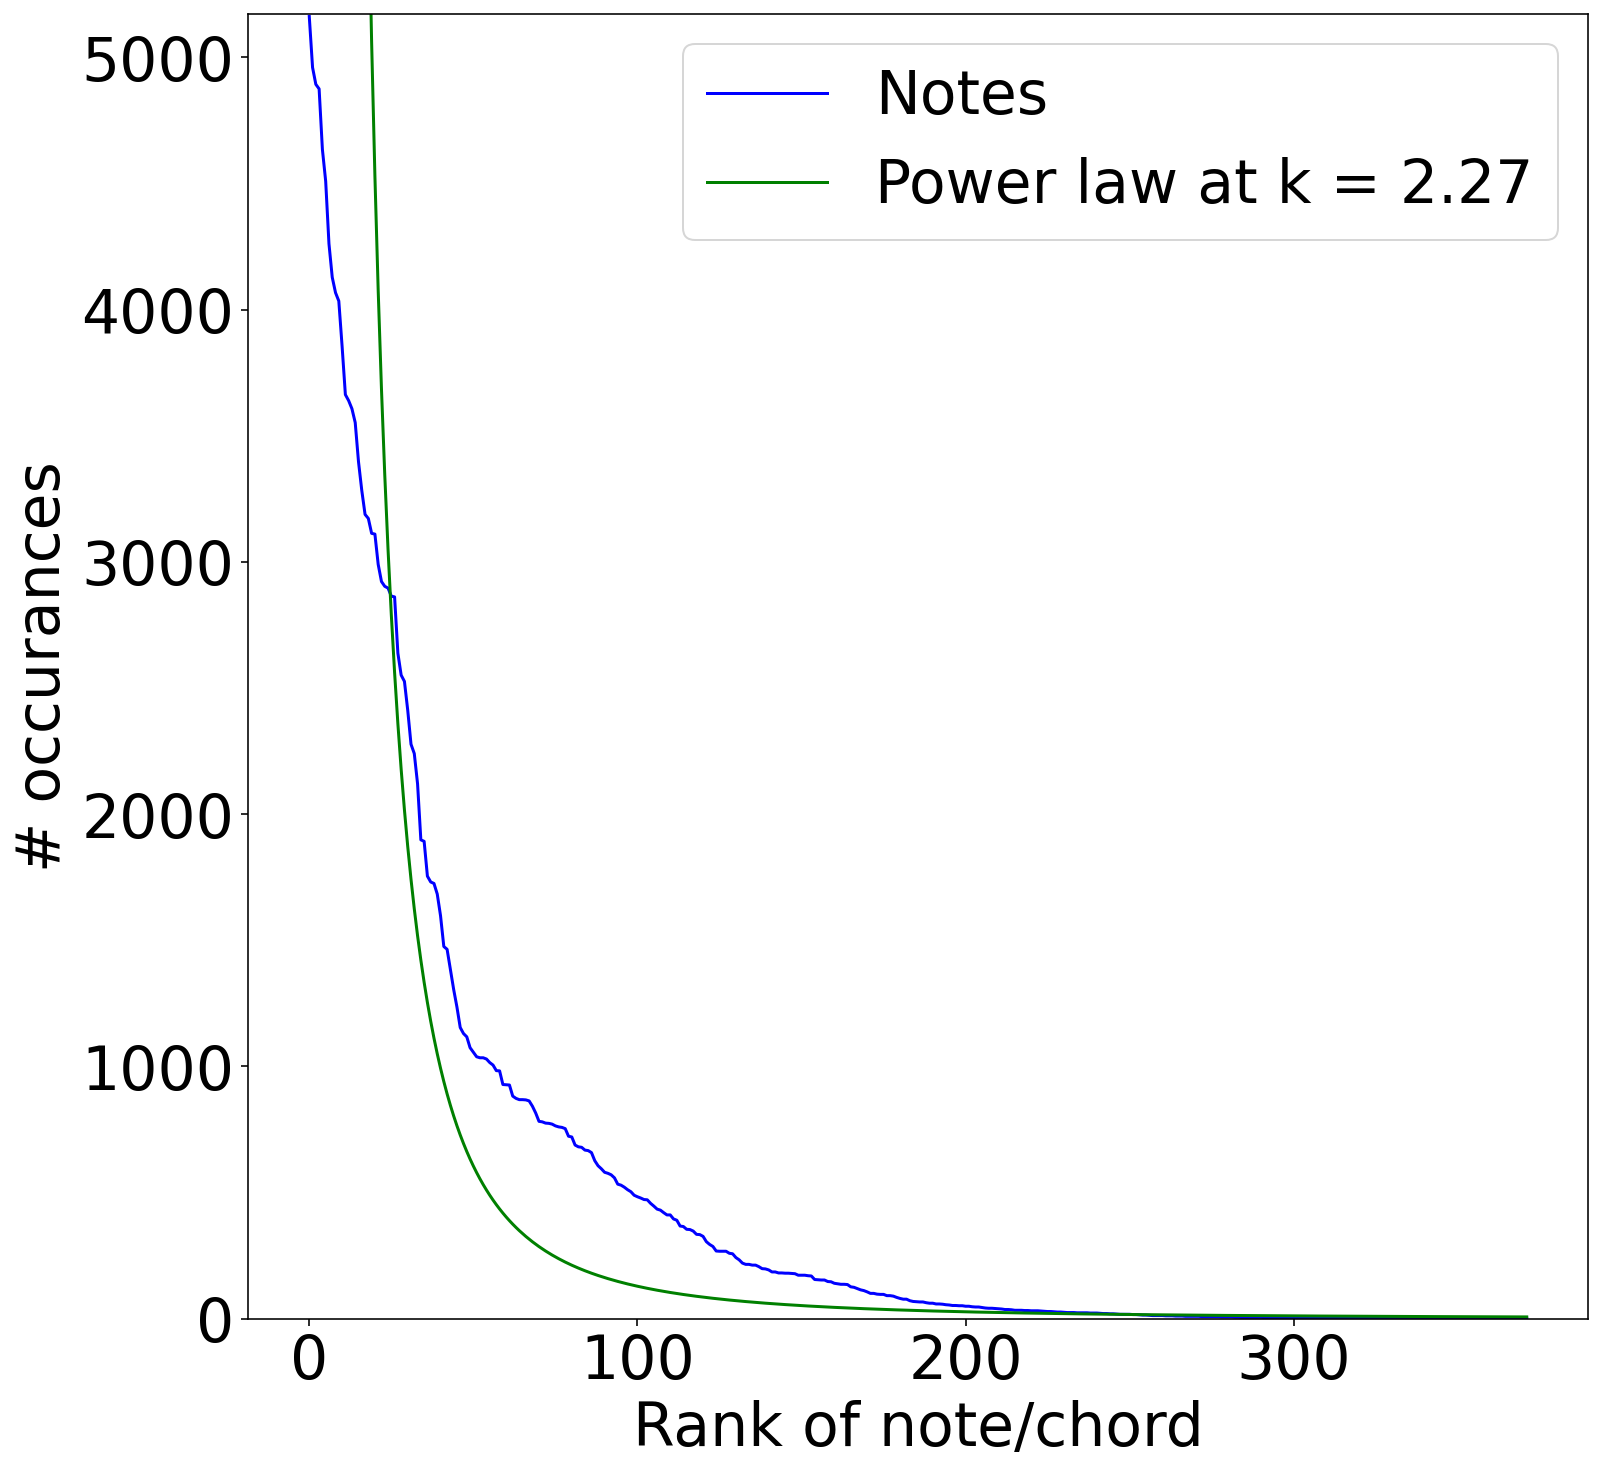

In [132]:
vizualize("data/pianovocab.pkl")

In [105]:
# save_vocab("data/", "data/pianovocab.pkl")